<a href="https://colab.research.google.com/github/Angelq2/FSI_RedNeuronal/blob/main/RN_ANIMALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Red Neuronal: clasificado del Dataset Animales**
En esta practica vamos a crear una red neuronal capaz de distinguir entre diferentes animales, entre ellos, tenemos las clases de elefantes, vacas, ardillas, mariposas y ovejas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Primero vamos a realizar una serie de comprobaciones para determinar que el dataset es accesible y no nos da ningún problema.**

In [ ]:
ls "/content/drive/MyDrive/RedNeuronal/dataset/animales/train"

elefante_train/  mucca_train/   scoiattolo_train/
farfalla_train/  pecora_train/


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
from PIL import ImageFile

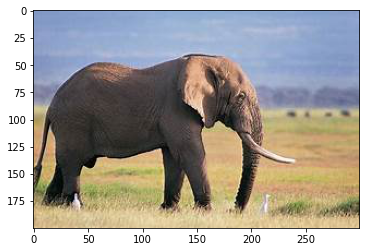

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/RedNeuronal/dataset/animales/train/elefante_train/OIP-0b38oXc_wRpF6Dr6Lsfc9QHaE7.jpeg', 'r')
imshow(np.asarray(pil_im))



***Como hemos podido comprobar, podemos acceder al conjunto de datos sin ningún inconveniente .***

# **Preparación Del Modelo:**

> En cuanto al código ejecutado en al preparación de la fuente de datos, hemos utilizado diferentes configuraciones del target_size, que como bien sabemos, es el encargado de redimensionar las imágenes para que todas tengan un mismo tamaño de estudio. Hemos usado la configuración de 200x200 que nos ha dado unos datos para nada satisfactorio, y tambien hemos usado la configuración de 100x100 que nos ha dado unos resultados tampoco satisfactorios.

> La configuración ultima con la que han trabajado nuestros diferentes modelos es de 150x150, que curiosamente nos da mejores resultados que los dos anteriores en cuanto a las variables tiempo, accurancy y loss se refiere. No es de extrañar que un redimensionamiento de las imágenes inadecuado incurra en una interpretación diferente por parte de la red neuronal sobre la cual trabajamos.










In [ ]:
# DATA SOURCE --------------------------------------------------

batch_size = 35 #Tamaño del minibatch

train_data_dir = '/content/drive/MyDrive/RedNeuronal/dataset/animales/train'
validation_data_dir = '/content/drive/MyDrive/RedNeuronal/dataset/animales/test'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2, #inclinacion de la imagen
      zoom_range=0.2,
      horizontal_flip=True)

test_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(150, 150),
      batch_size=batch_size,
      shuffle=True,
      class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
      validation_data_dir,
      target_size=(150, 150),
      batch_size=batch_size,
      shuffle=True,
      class_mode='categorical')

Found 6342 images belonging to 5 classes.
Found 1854 images belonging to 5 classes.


# **Modelo Final:**

**CNN_64, Maxpooling, CNN_64, Maxpooling, CNN_128, Maxpooling, FC_128**

*Función de perdida: mse*

*Optimizador: Adam(lr=0.0005)*

*Epocas: 35*

In [12]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(learning_rate=0.0005),
             metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      steps_per_epoch=130, #numero total de muestras antes de acabar y empezar la sigueinte epoca.
      epochs=35,
      validation_data=validation_generator,
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/35
130/130 - 48s - loss: 0.1366 - accuracy: 0.4297 - val_loss: 0.1192 - val_accuracy: 0.5453
Epoch 2/35
130/130 - 47s - loss: 0.1219 - accuracy: 0.5182 - val_loss: 0.1179 - val_accuracy: 0.5620
Epoch 3/35
130/130 - 47s - loss: 0.1071 - accuracy: 0.5971 - val_loss: 0.1019 - val_accuracy: 0.6181
Epoch 4/35
130/130 - 46s - loss: 0.1011 - accuracy: 0.6232 - val_loss: 0.0896 - val_accuracy: 0.6721
Epoch 5/35
130/130 - 46s - loss: 0.0935 - accuracy: 0.6521 - val_loss: 0.1136 - val_accuracy: 0.5971
Epoch 6/35
130/130 - 46s - loss: 0.0885 - accuracy: 0.6813 - val_loss: 0.0826 - val_accuracy: 0.7023
Epoch 7/35
130/130 - 46s - loss: 0.0861 - accuracy: 0.6950 - val_loss: 0.0908 - val_accuracy: 0.6764
Epoch 8/35
130/130 - 46s - loss: 0.0811 - accuracy: 0.7110 - val_loss: 0.0758 - val_accuracy: 0.7228
Epoch 9/35
130/130 - 46s - loss: 0.0816 - accuracy: 0.7116 - val_loss: 0.0804 - val_accuracy: 0.7147
Epoch 10/35
130/130 - 47s - loss: 0.0770 - accuracy: 0.7260 - val_loss: 0.0823 - val_accura

# **Gráficas:**

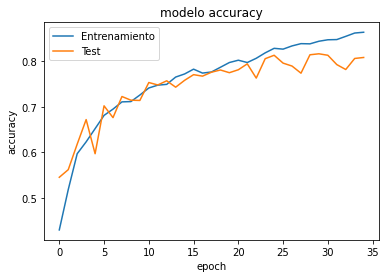

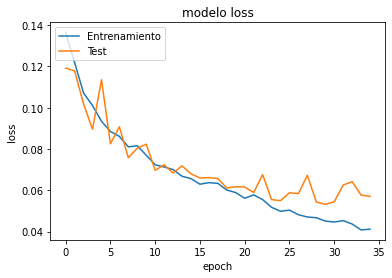

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


# **Pruebas:**

Probemos con imagenes que la red no conoce, imagenes que la red no conoce porque las hemos puesto en una carpeta solo para validad el ultimo mejor modelo probado.

(150, 150, 3)
['Elefante', 'Mariposa', 'Vaca', 'Oveja', 'Ardilla']


array([[1., 0., 0., 0., 0.]], dtype=float32)

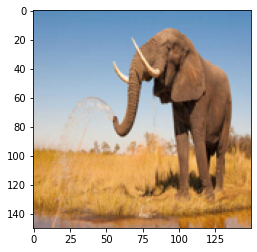

In [16]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/RedNeuronal/PruebaFinal/elefante.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Elefante','Mariposa','Vaca','Oveja', 'Ardilla'])
im = im.reshape(1,150,150,3)
model.predict(im)

(150, 150, 3)
['Elefante', 'Mariposa', 'Vaca', 'Oveja', 'Ardilla']


array([[0., 1., 0., 0., 0.]], dtype=float32)

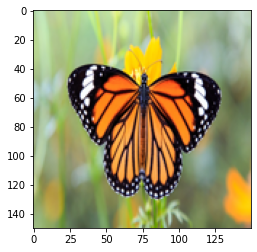

In [17]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/RedNeuronal/PruebaFinal/mariposa.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Elefante','Mariposa','Vaca','Oveja', 'Ardilla'])
im = im.reshape(1,150,150,3)
model.predict(im)

# **Error**

Presta atención a la salida del siguiente código:

(150, 150, 3)
['Elefante', 'Mariposa', 'Vaca', 'Oveja', 'Ardilla']


array([[0., 1., 0., 0., 0.]], dtype=float32)

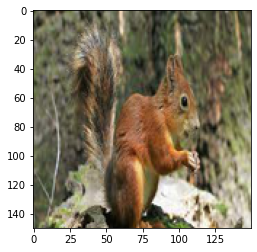

In [18]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/RedNeuronal/PruebaFinal/ardilla.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Elefante','Mariposa','Vaca','Oveja', 'Ardilla'])
im = im.reshape(1,150,150,3)
model.predict(im)

**Error ya que como vemos la red falla en la clasifiacion de la ardilla, y la clasifica como mariposa**

Esto se debe a que la red no esta lo suficientemente entrenada y no esta apunto, esto es una muestra de que el accurancy como indicador es muy importante y ajustarnos cuanto mas a su mayor exponente es un requisisto para asegurar una buena integridad de nuestra red.

(150, 150, 3)
['Elefante', 'Mariposa', 'Vaca', 'Oveja', 'Ardilla']


array([[0., 0., 0., 1., 0.]], dtype=float32)

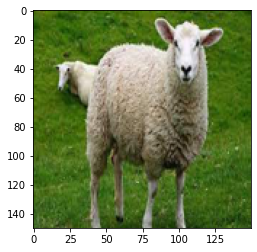

In [19]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/RedNeuronal/PruebaFinal/oveja.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Elefante','Mariposa','Vaca','Oveja', 'Ardilla'])
im = im.reshape(1,150,150,3)
model.predict(im)

(150, 150, 3)
['Elefante', 'Mariposa', 'Vaca', 'Oveja', 'Ardilla']


array([[0., 0., 1., 0., 0.]], dtype=float32)

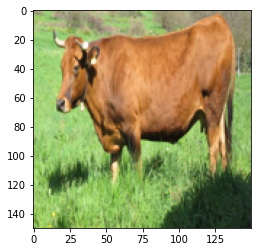

In [20]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/RedNeuronal/PruebaFinal/vaca.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Elefante','Mariposa','Vaca','Oveja', 'Ardilla'])
im = im.reshape(1,150,150,3)
model.predict(im)

# **Conclusiones:**

Después de hacer múltiples, pruebas, hemos comprobado la importancia de que la red aprenda a generalizar.

Tal vez los datos que le pasamos desde el dataset eran demasiado complejos, ya que por ejemplo, algunas imágenes, como en la clase elefante, existían imágenes que no mostraban al animal al completo, sino que mostraban partes de este, como una pata o cualquier elemento característico que nosotros como humanos somos capaces de identificar facilmente.

Esto puede que hay hecho que el proceso de aprendizaje para nuestra red neuronal se haya complicado un poco, y hayamos tenido que probar tantos modelos, aun asi, hemos podido comprobar la importancia de los hiperparamentros y sobre todo su complejidad a la hora de a priori determinar que configuración es mejor. 

Es difícil establecer una metodología para llevar a cabo una red, porque tal y como hemos visto cada red es diferente y su forma de funcionar en función de los hiperaparametos es muy variable.

En diferente modelos, se puede ver como menos neuronas han logrado conseguir mejores resultados que modelos que tiene mas y lo mismo ocurre a contrario. En cualquier caso, la conclusión que sacamos es que los hiperparamentos juegan un papel crucial en la construcción de una red neuronal, y sobre todo, que no existe una metodología que a priori nos ayude a especificar claramente dichos hiperpaarametos.


# **Modelos Probados:**

A continuación puedes ver algunos de los diferentes modelos que hemos ido probando y sus diferentes resultados. Existen modelos que fueron cancelados antes de terminar porque se veía que su capacidad para converger era muy limitada.

*NOTA: El orden de los sigueintes modelos no es el de creación.*

# ** Modelo 1**
**CNN_64, Maxpooling, CNN_64, Maxpooling, CNN_128, Maxpooling, FC_256**

*Función de perdida: mse*

*Optimizador: Adam(lr=0.0005)*

*Epocas: 15*


In [ ]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(learning_rate=0.0005),
             metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      steps_per_epoch=130, #numero total de muestras antes de acabar y empezar la sigueinte epoca.
      epochs=15,
      validation_data=validation_generator,
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/15
130/130 - 2906s - loss: 0.1321 - accuracy: 0.4464 - val_loss: 0.1292 - val_accuracy: 0.5313
Epoch 2/15
130/130 - 631s - loss: 0.1139 - accuracy: 0.5648 - val_loss: 0.1011 - val_accuracy: 0.6273
Epoch 3/15
130/130 - 211s - loss: 0.1012 - accuracy: 0.6181 - val_loss: 0.1035 - val_accuracy: 0.6343
Epoch 4/15
130/130 - 90s - loss: 0.0940 - accuracy: 0.6601 - val_loss: 0.1050 - val_accuracy: 0.6311
Epoch 5/15
130/130 - 59s - loss: 0.0877 - accuracy: 0.6793 - val_loss: 0.0868 - val_accuracy: 0.6872
Epoch 6/15
130/130 - 54s - loss: 0.0848 - accuracy: 0.6935 - val_loss: 0.0873 - val_accuracy: 0.6807
Epoch 7/15
130/130 - 47s - loss: 0.0823 - accuracy: 0.7077 - val_loss: 0.0817 - val_accuracy: 0.7001
Epoch 8/15
130/130 - 47s - loss: 0.0755 - accuracy: 0.7295 - val_loss: 0.0761 - val_accuracy: 0.7141
Epoch 9/15
130/130 - 45s - loss: 0.0751 - accuracy: 0.7313 - val_loss: 0.0886 - val_accuracy: 0.6785
Epoch 10/15
130/130 - 46s - loss: 0.0731 - accuracy: 0.7382 - val_loss: 0.0751 - val_ac

# ** Modelo 2**
**CNN_64, Maxpooling, CNN_64, Maxpooling, CNN_128, Maxpooling, FC_264**

*Función de perdida: mse*

*Optimizador: Adam(lr=0.0005)*

*Epocas: 15*


In [8]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(learning_rate=0.0005),
             metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      steps_per_epoch=130, #numero total de muestras antes de acabar y empezar la sigueinte epoca.
      epochs=15,
      validation_data=validation_generator,
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/15
130/130 - 47s - loss: 0.1402 - accuracy: 0.3744 - val_loss: 0.1401 - val_accuracy: 0.4693
Epoch 2/15
130/130 - 46s - loss: 0.1233 - accuracy: 0.5066 - val_loss: 0.1095 - val_accuracy: 0.5577
Epoch 3/15
130/130 - 46s - loss: 0.1149 - accuracy: 0.5611 - val_loss: 0.1112 - val_accuracy: 0.5906
Epoch 4/15
130/130 - 46s - loss: 0.1084 - accuracy: 0.5876 - val_loss: 0.1028 - val_accuracy: 0.6354
Epoch 5/15
130/130 - 46s - loss: 0.1043 - accuracy: 0.6084 - val_loss: 0.0870 - val_accuracy: 0.6850
Epoch 6/15
130/130 - 46s - loss: 0.0985 - accuracy: 0.6398 - val_loss: 0.0892 - val_accuracy: 0.6812
Epoch 7/15
130/130 - 46s - loss: 0.0949 - accuracy: 0.6422 - val_loss: 0.0879 - val_accuracy: 0.6904
Epoch 8/15
130/130 - 45s - loss: 0.0921 - accuracy: 0.6632 - val_loss: 0.1007 - val_accuracy: 0.6375
Epoch 9/15
130/130 - 45s - loss: 0.0889 - accuracy: 0.6743 - val_loss: 0.0863 - val_accuracy: 0.7028
Epoch 10/15
130/130 - 45s - loss: 0.0885 - accuracy: 0.6709 - val_loss: 0.0807 - val_accura

KeyboardInterrupt: ignored

# ** Modelo 3**
**CNN_64, Maxpooling, CNN_64, Maxpooling, CNN_128, Maxpooling, FC_64**

*Función de perdida: mse*

*Optimizador: Adam(lr=0.0005)*

*Epocas: 25*

Igual que el anterior pero con mas epocas


In [10]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(learning_rate=0.0005),
             metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      steps_per_epoch=150, #numero total de muestras antes de acabar y empezar la sigueinte epoca.
      epochs=25,
      validation_data=validation_generator,
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/25
150/150 - 54s - loss: 0.1450 - accuracy: 0.3449 - val_loss: 0.1227 - val_accuracy: 0.5124
Epoch 2/25
150/150 - 51s - loss: 0.1300 - accuracy: 0.4502 - val_loss: 0.1294 - val_accuracy: 0.5049
Epoch 3/25
150/150 - 51s - loss: 0.1264 - accuracy: 0.4711 - val_loss: 0.1248 - val_accuracy: 0.5205
Epoch 4/25
150/150 - 51s - loss: 0.1205 - accuracy: 0.4998 - val_loss: 0.1173 - val_accuracy: 0.5464
Epoch 5/25
150/150 - 51s - loss: 0.1177 - accuracy: 0.5220 - val_loss: 0.1057 - val_accuracy: 0.5992
Epoch 6/25
150/150 - 52s - loss: 0.1161 - accuracy: 0.5324 - val_loss: 0.0989 - val_accuracy: 0.6246
Epoch 7/25
150/150 - 51s - loss: 0.1080 - accuracy: 0.5835 - val_loss: 0.0964 - val_accuracy: 0.6591
Epoch 8/25
150/150 - 51s - loss: 0.1052 - accuracy: 0.5940 - val_loss: 0.0861 - val_accuracy: 0.6953
Epoch 9/25
150/150 - 51s - loss: 0.1011 - accuracy: 0.6143 - val_loss: 0.0897 - val_accuracy: 0.7017
Epoch 10/25
150/150 - 51s - loss: 0.0974 - accuracy: 0.6277 - val_loss: 0.0832 - val_accura

KeyboardInterrupt: ignored

# ** Modelo 4**
**CNN_64, Maxpooling, CNN_64, Maxpooling, CNN_128, Maxpooling, FC_128**

*Función de perdida: mse*

*Optimizador: Adam(lr=0.0005)*

*Epocas: 20*


In [11]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(learning_rate=0.0005),
             metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      steps_per_epoch=130, #numero total de muestras antes de acabar y empezar la sigueinte epoca.
      epochs=20,
      validation_data=validation_generator,
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/20
130/130 - 47s - loss: 0.1386 - accuracy: 0.3981 - val_loss: 0.1131 - val_accuracy: 0.5502
Epoch 2/20
130/130 - 45s - loss: 0.1213 - accuracy: 0.5215 - val_loss: 0.1138 - val_accuracy: 0.5464
Epoch 3/20
130/130 - 45s - loss: 0.1102 - accuracy: 0.5781 - val_loss: 0.1030 - val_accuracy: 0.6122
Epoch 4/20
130/130 - 46s - loss: 0.1014 - accuracy: 0.6185 - val_loss: 0.0967 - val_accuracy: 0.6516
Epoch 5/20
130/130 - 46s - loss: 0.0971 - accuracy: 0.6384 - val_loss: 0.1213 - val_accuracy: 0.5831
Epoch 6/20
130/130 - 46s - loss: 0.0931 - accuracy: 0.6544 - val_loss: 0.0945 - val_accuracy: 0.6683
Epoch 7/20
130/130 - 46s - loss: 0.0900 - accuracy: 0.6721 - val_loss: 0.1003 - val_accuracy: 0.6548
Epoch 8/20
130/130 - 45s - loss: 0.0860 - accuracy: 0.6922 - val_loss: 0.0750 - val_accuracy: 0.7357
Epoch 9/20
130/130 - 46s - loss: 0.0846 - accuracy: 0.6980 - val_loss: 0.0928 - val_accuracy: 0.6882
Epoch 10/20
130/130 - 47s - loss: 0.0801 - accuracy: 0.7156 - val_loss: 0.0758 - val_accura

# ** Modelo 5**
**CNN_64, Maxpooling, CNN_64, Maxpooling, CNN_128, FC_128**

*Función de perdida: categorical_crossentropy*

*Optimizador: Adadelta()*

*Epocas: 15*

In [ ]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2,
      shuffle=True  
)

Epoch 1/15
182/182 - 46s - loss: 1.5983 - accuracy: 0.2302 - val_loss: 1.5823 - val_accuracy: 0.2821
Epoch 2/15
182/182 - 43s - loss: 1.5839 - accuracy: 0.2591 - val_loss: 1.5669 - val_accuracy: 0.3107
Epoch 3/15
182/182 - 43s - loss: 1.5683 - accuracy: 0.2975 - val_loss: 1.5472 - val_accuracy: 0.3128
Epoch 4/15
182/182 - 43s - loss: 1.5534 - accuracy: 0.3072 - val_loss: 1.5340 - val_accuracy: 0.3770
Epoch 5/15
182/182 - 43s - loss: 1.5357 - accuracy: 0.3286 - val_loss: 1.5167 - val_accuracy: 0.3700
Epoch 6/15
182/182 - 43s - loss: 1.5226 - accuracy: 0.3363 - val_loss: 1.4963 - val_accuracy: 0.3910
Epoch 7/15
182/182 - 43s - loss: 1.5040 - accuracy: 0.3549 - val_loss: 1.4767 - val_accuracy: 0.4105
Epoch 8/15
182/182 - 43s - loss: 1.4888 - accuracy: 0.3649 - val_loss: 1.4637 - val_accuracy: 0.4056
Epoch 9/15
182/182 - 43s - loss: 1.4745 - accuracy: 0.3723 - val_loss: 1.4433 - val_accuracy: 0.4293
Epoch 10/15
182/182 - 43s - loss: 1.4651 - accuracy: 0.3827 - val_loss: 1.4290 - val_accura

# ** Modelo 6**
**CNN_64, Maxpooling, CNN_128, FC_128**

*Función de perdida: categorical_crossentropy*

*Optimizador: Adadelta()*

*Epocas: 15*


In [ ]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/15
182/182 - 46s - loss: 1.5729 - accuracy: 0.2714 - val_loss: 1.5230 - val_accuracy: 0.3441
Epoch 2/15
182/182 - 44s - loss: 1.5144 - accuracy: 0.3303 - val_loss: 1.4715 - val_accuracy: 0.3867
Epoch 3/15
182/182 - 44s - loss: 1.4784 - accuracy: 0.3603 - val_loss: 1.4977 - val_accuracy: 0.3603
Epoch 4/15
182/182 - 44s - loss: 1.4521 - accuracy: 0.3806 - val_loss: 1.3972 - val_accuracy: 0.4358
Epoch 5/15
182/182 - 43s - loss: 1.4217 - accuracy: 0.3950 - val_loss: 1.3875 - val_accuracy: 0.4277
Epoch 6/15
182/182 - 44s - loss: 1.4032 - accuracy: 0.4166 - val_loss: 1.3514 - val_accuracy: 0.4671
Epoch 7/15
182/182 - 44s - loss: 1.3824 - accuracy: 0.4260 - val_loss: 1.3567 - val_accuracy: 0.4401
Epoch 8/15
182/182 - 43s - loss: 1.3576 - accuracy: 0.4499 - val_loss: 1.3163 - val_accuracy: 0.4757
Epoch 9/15
182/182 - 44s - loss: 1.3486 - accuracy: 0.4522 - val_loss: 1.3016 - val_accuracy: 0.4757
Epoch 10/15
182/182 - 44s - loss: 1.3287 - accuracy: 0.4598 - val_loss: 1.2903 - val_accura

# ** Modelo 7**
**CNN_64, Maxpooling , CNN_128, FC_128**

*Función de perdida: categorical_crossentropy*

*Optimizador: Adadelta()*

*Epocas: 15*

In [ ]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#model.compile(loss='mse',
#             optimizer=keras.optimizers.Adam(lr=0.0005),
#             metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      #steps_per_epoch=100, #numero total de muestras antes de acabar y empezar la sigueinte epoca.
      epochs=30,
      validation_data=validation_generator,
      #validation_steps=200,  # solo esta si esta el steps_per_epoch
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/30
182/182 - 46s - loss: 1.5819 - accuracy: 0.2635 - val_loss: 1.5388 - val_accuracy: 0.3220
Epoch 2/30
182/182 - 44s - loss: 1.5277 - accuracy: 0.3210 - val_loss: 1.4793 - val_accuracy: 0.3894
Epoch 3/30
182/182 - 44s - loss: 1.4960 - accuracy: 0.3348 - val_loss: 1.4654 - val_accuracy: 0.4083
Epoch 4/30
182/182 - 44s - loss: 1.4698 - accuracy: 0.3642 - val_loss: 1.4273 - val_accuracy: 0.4250
Epoch 5/30
182/182 - 44s - loss: 1.4525 - accuracy: 0.3838 - val_loss: 1.4158 - val_accuracy: 0.4304
Epoch 6/30
182/182 - 44s - loss: 1.4291 - accuracy: 0.4063 - val_loss: 1.3687 - val_accuracy: 0.4455
Epoch 7/30
182/182 - 44s - loss: 1.4015 - accuracy: 0.4152 - val_loss: 1.3647 - val_accuracy: 0.4585
Epoch 8/30
182/182 - 44s - loss: 1.3860 - accuracy: 0.4264 - val_loss: 1.3365 - val_accuracy: 0.4833
Epoch 9/30
182/182 - 44s - loss: 1.3631 - accuracy: 0.4450 - val_loss: 1.3056 - val_accuracy: 0.4860
Epoch 10/30
182/182 - 44s - loss: 1.3433 - accuracy: 0.4540 - val_loss: 1.2962 - val_accura

# ** Modelo 8**
**CNN_32, Maxpooling, CNN_64, FC_64**

*Función de perdida: categorical_crossentropy*

*Optimizador: Adadelta()*

*Epocas: 15*

In [ ]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#model.compile(loss='mse',
#             optimizer=keras.optimizers.Adam(lr=0.0005),
#             metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      #steps_per_epoch=100, #numero total de muestras antes de acabar y empezar la sigueinte epoca.
      epochs=15,
      validation_data=validation_generator,
      #validation_steps=200,  # solo esta si esta el steps_per_epoch
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/15
182/182 - 44s - loss: 1.5844 - accuracy: 0.2720 - val_loss: 1.5410 - val_accuracy: 0.3883
Epoch 2/15
182/182 - 43s - loss: 1.5280 - accuracy: 0.3500 - val_loss: 1.4815 - val_accuracy: 0.4186
Epoch 3/15
182/182 - 43s - loss: 1.4909 - accuracy: 0.3668 - val_loss: 1.4361 - val_accuracy: 0.4331
Epoch 4/15
182/182 - 43s - loss: 1.4602 - accuracy: 0.3803 - val_loss: 1.4016 - val_accuracy: 0.4531
Epoch 5/15
182/182 - 43s - loss: 1.4348 - accuracy: 0.3981 - val_loss: 1.3911 - val_accuracy: 0.4498
Epoch 6/15
182/182 - 43s - loss: 1.4169 - accuracy: 0.4205 - val_loss: 1.3552 - val_accuracy: 0.4703
Epoch 7/15
182/182 - 43s - loss: 1.3890 - accuracy: 0.4270 - val_loss: 1.3324 - val_accuracy: 0.4860
Epoch 8/15
182/182 - 43s - loss: 1.3770 - accuracy: 0.4289 - val_loss: 1.3130 - val_accuracy: 0.4844
Epoch 9/15
182/182 - 43s - loss: 1.3606 - accuracy: 0.4393 - val_loss: 1.3001 - val_accuracy: 0.4989
Epoch 10/15
182/182 - 43s - loss: 1.3496 - accuracy: 0.4494 - val_loss: 1.2864 - val_accura

# ** Modelo 9**
**CNN_32, Maxpooling,CNN_64, FC_64**

*Función de perdida: categorical_crossentropy*

*Optimizador: Adadelta())*

*Epocas: 15*

In [ ]:
# MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
#model.compile(loss='mse',
#             optimizer=keras.optimizers.Adam(lr=0.0005),
#             metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      #steps_per_epoch=100, #numero total de muestras antes de acabar y empezar la sigueinte epoca.
      epochs=32,
      validation_data=validation_generator,
      #validation_steps=200,  # solo esta si esta el steps_per_epoch
      verbose=2,    # una linea por epoca
      shuffle=True  #mezcla de datos aleatoriamente
)

Epoch 1/32
100/100 - 27s - loss: 1.6124 - accuracy: 0.2217 - val_loss: 1.5730 - val_accuracy: 0.3026
Epoch 2/32
100/100 - 26s - loss: 1.5820 - accuracy: 0.2592 - val_loss: 1.5528 - val_accuracy: 0.3749
Epoch 3/32
100/100 - 26s - loss: 1.5583 - accuracy: 0.2826 - val_loss: 1.5429 - val_accuracy: 0.3279
Epoch 4/32
100/100 - 26s - loss: 1.5408 - accuracy: 0.3131 - val_loss: 1.5054 - val_accuracy: 0.4013
Epoch 5/32
100/100 - 26s - loss: 1.5235 - accuracy: 0.3151 - val_loss: 1.4974 - val_accuracy: 0.3986
Epoch 6/32
100/100 - 26s - loss: 1.5022 - accuracy: 0.3520 - val_loss: 1.4737 - val_accuracy: 0.4175
Epoch 7/32
100/100 - 26s - loss: 1.4870 - accuracy: 0.3669 - val_loss: 1.4531 - val_accuracy: 0.4358
Epoch 8/32
100/100 - 25s - loss: 1.4796 - accuracy: 0.3583 - val_loss: 1.4411 - val_accuracy: 0.4358
Epoch 9/32
100/100 - 26s - loss: 1.4626 - accuracy: 0.3777 - val_loss: 1.4413 - val_accuracy: 0.4250
Epoch 10/32
100/100 - 26s - loss: 1.4621 - accuracy: 0.3678 - val_loss: 1.4177 - val_accura

KeyboardInterrupt: ignored

# ** Modelo 10**
**CNN_16, Maxpooling , CNN_32, Maxpooling, CNN_32, Maxpooling, CNN_64, Maxpooling, CNN_256**

*Función de perdida: categorical_crossentropy*

*Optimizador: Adadelta())*

*Epocas: 15*


In [ ]:
 #MODEL --------------------------------------------------

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

history = model.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator,
      verbose=2, 
      shuffle=True  
)


Epoch 1/20
182/182 - 44s - loss: 1.6019 - accuracy: 0.2146 - val_loss: 1.5919 - val_accuracy: 0.2729
Epoch 2/20
182/182 - 42s - loss: 1.5999 - accuracy: 0.2170 - val_loss: 1.5891 - val_accuracy: 0.2751
Epoch 3/20
182/182 - 42s - loss: 1.5978 - accuracy: 0.2182 - val_loss: 1.5865 - val_accuracy: 0.2762
Epoch 4/20
182/182 - 42s - loss: 1.5965 - accuracy: 0.2190 - val_loss: 1.5842 - val_accuracy: 0.2762
Epoch 5/20
182/182 - 42s - loss: 1.5946 - accuracy: 0.2187 - val_loss: 1.5821 - val_accuracy: 0.2762
Epoch 6/20
182/182 - 42s - loss: 1.5932 - accuracy: 0.2193 - val_loss: 1.5803 - val_accuracy: 0.2762
Epoch 7/20
182/182 - 42s - loss: 1.5917 - accuracy: 0.2209 - val_loss: 1.5784 - val_accuracy: 0.2762
Epoch 8/20
182/182 - 42s - loss: 1.5902 - accuracy: 0.2208 - val_loss: 1.5767 - val_accuracy: 0.2762
Epoch 9/20
182/182 - 42s - loss: 1.5889 - accuracy: 0.2200 - val_loss: 1.5749 - val_accuracy: 0.2767
Epoch 10/20
182/182 - 42s - loss: 1.5874 - accuracy: 0.2211 - val_loss: 1.5731 - val_accura

KeyboardInterrupt: ignored